In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [236]:
binary_df = pd.read_csv('../../Data Science/Diabetes/binary_diabetes.csv')

# Visual exploration of some categorical variables

## Racial data

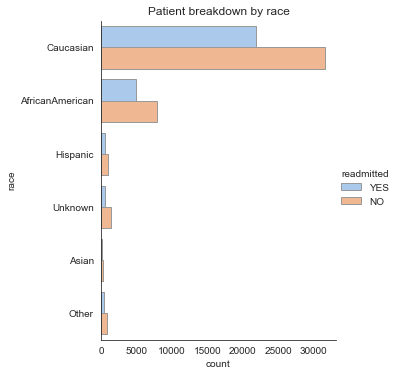

In [223]:
sns.catplot(y="race", hue="readmitted", kind="count",
            palette="pastel", edgecolor=".6",
            data=binary_df);
plt.title("Patient breakdown by race")
plt.show()

Our dataset appears to be comprised mostly of Caucasian patients; in and of itself, this is not necessarily a predictive
factor; however, there are socioeconomic correlations with race, and our predictive model might be able to pick up any signal from this variable. Just something to keep in mind.

## Age data

In [239]:
binary_df.age = pd.Categorical(binary_df.age, 
                      categories=['[0-10)','[10-20)','[20-30)','[30-40)',
                                  '[40-50)','[50-60)','[60-70)','[70-80)', '[80-90)', '[90-100)'],
                      ordered=True)

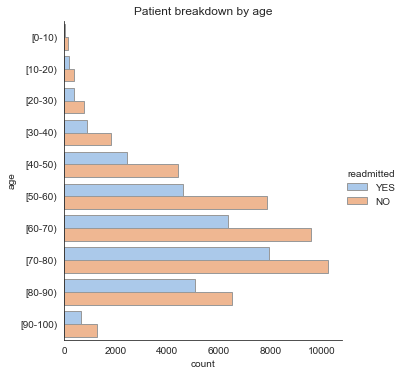

In [240]:
sns.catplot(y="age", hue="readmitted", kind="count",
            palette="pastel", edgecolor=".6",
            data=binary_df);
plt.title("Patient breakdown by age")
plt.show()

Unsurprisingly, most patients in a medical database trend older, with the older age groups accounting for most of
the readmitted patients.

## Gender data

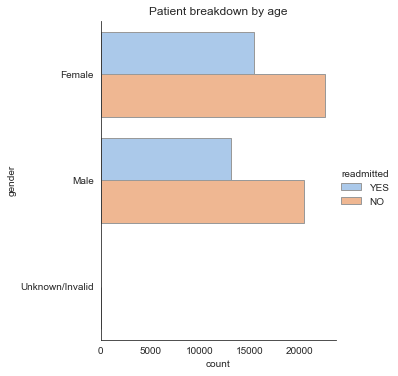

In [241]:
sns.catplot(y="gender", hue="readmitted", kind="count",
            palette="pastel", edgecolor=".6",
            data=binary_df);
plt.title("Patient breakdown by gender")
plt.show()

Males and females appear to be represented almost equally in this dataset. Again, men and women have different 
physical conditions (broadly speaking) which may affect their likelihood of readmissions, but it is not something
that this visual exploration can pick up by itself.

## Primary diagnosis

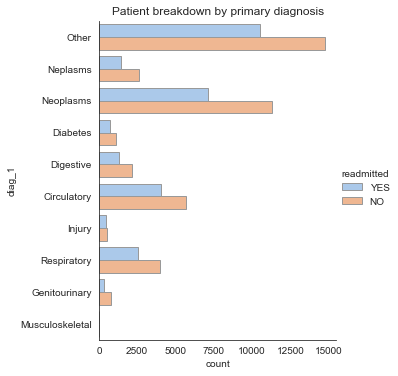

In [243]:
sns.catplot(y="diag_1", hue="readmitted", kind="count",
            palette="pastel", edgecolor=".6",
            data=binary_df);
plt.title("Patient breakdown by primary diagnosis")
plt.show()

Not so helpfully, most diagnoses fall into the 'other' category. Of the remaining primary diagnoses, neoplasm-based
diagnoses occur most often, and as we can see, account for most of the readmitted patients, with circulatory 
and respiratory accounting for most of the remaining.

## Readmissions based on whether patients were prescribed diabetes medication

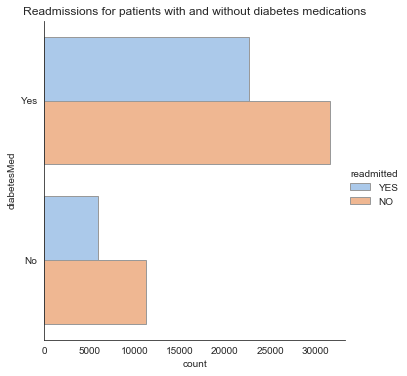

In [388]:
sns.catplot(y="diabetesMed", hue="readmitted", kind="count",
            palette="pastel", edgecolor=".6",
            data=binary_df);
plt.title("Readmissions for patients with and without diabetes medications")
plt.show()

As this database was originally supposed to be used to study diabetic patients, I decided to take a look at the 
patients who were prescribed diabetic medication or not.

It appears that patients prescribed diabetic medication constituted more of the readmissions than patients who were not. This could be explained by the simple fact that patients prescribed diabetic medications are in fact,
diabetic, and that this could be why they are more likely to be readmitted in the first place.

## Readmissions for patients based on insulin levels (if prescribed)

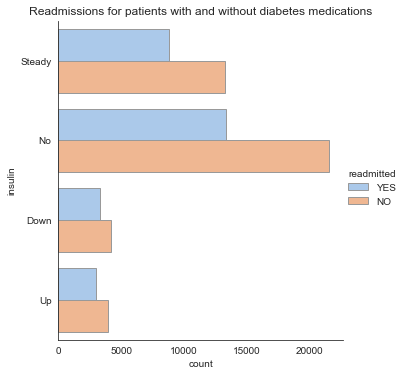

In [386]:
sns.catplot(y="insulin", hue="readmitted", kind="count",
            palette="pastel", edgecolor=".6",
            data=binary_df);
plt.title("Readmissions for patients with and without diabetes medications")
plt.show()

Here we see that patients who have fluctuating insulin levels (whether down or up) tend to be more likely to be 
readmitted than patients whose insulin levels are steady. This may be indicative of the patient's physiology in relation
to their diabeti condition.

# Readmissions, visualized across medical specialties and primary diagnoses

In [390]:
### Wrangling data to get it in the right form for a heatmap

In [384]:
readmitted_df = binary_df[binary_df.readmitted=='YES'] #Restrict data to only patients who got readmitted
#Getting counts of patients in each category
heatmap_df = readmitted_df.groupby(['medical_specialty', 'diag_1']).size().reset_index() 
heatmap_df.columns =['Medical Specialty', 'Primary Diagnosis', 'Count']
#Pivoting to allow NaN cells, which we can then fill in with 0s
heatmap_df = heatmap_df.pivot(index='Medical Specialty', columns='Primary Diagnosis', values='Count') 
heatmap_df = heatmap_df.fillna(0)
heatmap_df = heatmap_df.reset_index()
heatmap_df = heatmap_df[heatmap_df['Medical Specialty'] != 'Unknown']
heatmap_df = heatmap_df.set_index('Medical Specialty')
heatmap_df = heatmap_df.drop(['Other'], axis=1)
heatmap_df = heatmap_df.stack().rename('Count').reset_index() #Bring it back to a format suitable for heatmap

### Interactive visualization - heatmap

In [396]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, ColumnDataSource, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.palettes import brewer

# Had a specific mapper to map color with value
mapper = LinearColorMapper(
    palette = brewer['RdBu'][10], low=heatmap_df.Count.min(), high=heatmap_df.Count.max())

p = figure(
    plot_width=800,
    plot_height=800,
    title="My plot",
    x_range=list(heatmap_df['Primary Diagnosis'].drop_duplicates()),
    y_range=list(heatmap_df['Medical Specialty'].drop_duplicates()),
    toolbar_location='right',
    tools="pan, box_select, wheel_zoom",
    x_axis_location="below")
# Create rectangle for heatmap
p.rect(
    x="Primary Diagnosis",
    y="Medical Specialty",
    width=1,
    height=1,
    source=ColumnDataSource(_),
    line_color=None,
    fill_color=transform('Count', mapper))
# Add legend
color_bar = ColorBar(
    color_mapper=mapper,
    location=(0, 0),
    ticker=BasicTicker(desired_num_ticks=len(colors)))

p.add_layout(color_bar, 'right')
p.xaxis.major_label_orientation = "vertical"
output_notebook()
show(p)

Loading BokehJS ...

This interactive graphic represents the frequency of patients who get readmitted, categorizing them by their 
primary diagnosis alongside the medical specialty they are asociated with. 

From this graphic, we can see that patients with neoplasms have a much higher frequency of being readmitted 
across all departments, which is unsurprising given the nature of cancer as a disease. Similarly, circulatory disease 
is associated with high numbers of readmissions; knowing that heart disease is a hugely common affliction in Americans,
this is to be expected.

Strikingly, Internal Medicine is the department which has the highest numbers of readmissions
across the various primary diagnoses. From a management perspective, it is worth looking closer at this department
when assessing the risk of readmissions for a given patient.

# Visual Exploration of numerical data

In [ ]:
vars_interest = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
                 'number_emergency', 'number_inpatient', 'number_diagnoses']

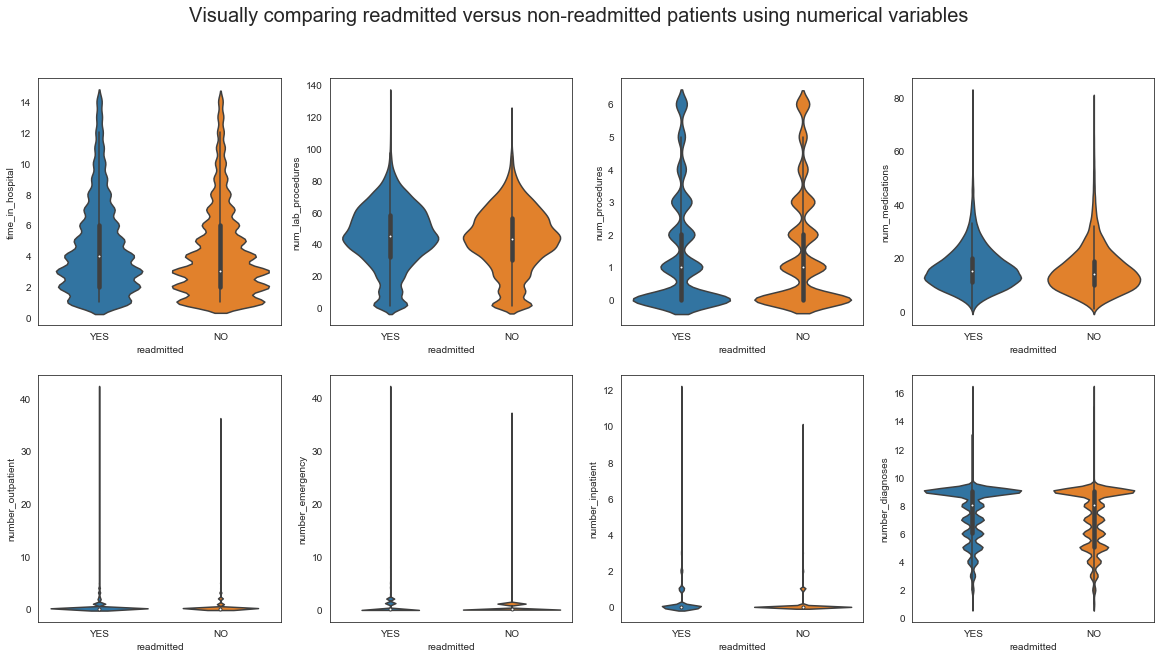

In [157]:
mpl.rcParams['figure.figsize'] = (20,10)
sns.set_style('white')
f, axes = plt.subplots(2, 4)
for i in zip(range(0,4), vars_interest[0:4]):
        sns.violinplot(x='readmitted', y=i[1], data=binary_df, ax=axes[0, i[0]])
for i in zip(range(0,4), vars_interest[4:]):
        sns.violinplot(x='readmitted', y=i[1], data=binary_df, ax=axes[1, i[0]])
f.suptitle("Visually comparing readmitted versus non-readmitted patients using numerical variables", size=20)
plt.show()

Unfortunately, it is not easy to tell from the distribution of the data, whether there are any significant differences 
between readmitted and non-readmitted patients. With regards to these variables, it would be necessary to perform
statistical tests (see: Inferential Statistics).